# Stats via Steam Game Store

## Initialize and load dataframes

In [111]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

platforms = ['win', 'mac', 'linux']
tags = set()
top_played = dict()
with open("./topplayed.json", "r") as fp:
  top_played = json.load(fp)

top_sellers = dict()
with open("./topsellers.json", "r") as fp:
  top_sellers = json.load(fp)

games_ts = pd.DataFrame(top_sellers['games'])
games_tp = pd.DataFrame(top_played['games'])

for tg in games_ts["tags"]:
  tags = tags.union(set(tg))

for tg in games_tp["tags"]:
  tags = tags.union(set(tg))

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

## Top played games by plaform

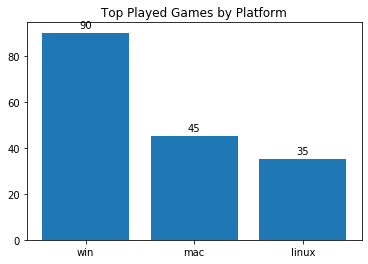

In [114]:
tp_by_platforms = pd.DataFrame(games_tp['platforms'].to_list(), columns=['win', 'mac', 'linux'])
tp_by_platforms['win'] = np.where(tp_by_platforms['win'] == "win", 1, 0)
tp_by_platforms['mac'] = np.where(tp_by_platforms['mac'] == "mac", 1, 0)
tp_by_platforms['linux'] = np.where(tp_by_platforms['linux'] == "linux", 1, 0)
tp_by_platforms_sum = tp_by_platforms.sum().to_list()
fig1, ax1 = plt.subplots()
ax1.set_title("Top Played Games by Platform")
autolabel(ax1.bar(platforms, tp_by_platforms_sum), ax1)
plt.show()

## Top selling games by plaform

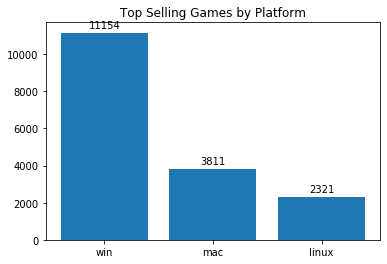

In [116]:
ts_by_platforms = pd.DataFrame(games_ts['platforms'].to_list(), columns=['win', 'mac', 'linux', 'extra'])
ts_by_platforms['win'] = np.where(ts_by_platforms['win'] == "win", 1, 0)
ts_by_platforms['mac'] = np.where(ts_by_platforms['mac'] == "mac", 1, 0)
ts_by_platforms['linux'] = np.where(ts_by_platforms['linux'] == "linux", 1, 0)
ts_by_platforms_sum = ts_by_platforms.sum().to_list()
fig0, ax0 = plt.subplots()
ax0.set_title("Top Selling Games by Platform")
autolabel(ax0.bar(platforms, ts_by_platforms_sum), ax0)
plt.show()

## Top Played games stats

In [19]:
tp_free = games_tp[ games_tp['price'] == 0 ]
print("Top Play Free Games", tp_free['name'].count(), "out of", games_tp['name'].count())
tp_disc = games_tp[ games_tp['discount'] != 0 ]
print("Top Play Discounted Games", tp_disc['name'].count(), "out of", games_tp['name'].count())
tp_maxd = games_tp[games_tp['discount'] == games_tp['discount'].max()]
print("Top Play Max Discount", tp_maxd['discount'].item(), "% on", tp_maxd['name'].item())

Top Play Free Games 21 out of 90
Top Play Discounted Games 3 out of 90
Top Play Max Discount 80.0 % on Europa Universalis IV


## Top Selling games stats

In [71]:
ts_free = games_ts[ games_ts['price'] == 0 ]
print("Top Play Free Games", ts_free['name'].count(), "out of", games_ts['name'].count())
ts_disc = games_ts[ games_ts['discount'] != 0 ]
print("Top Play Discounted Games", ts_disc['name'].count(), "out of", games_ts['name'].count())
non_zero = games_ts[games_ts['original_price'] != 0]
ts_maxd = non_zero[non_zero['discount'] == non_zero['discount'].max()]
print("Top Play Max Discount", ts_maxd['discount'].item(), "% on", ts_maxd['name'].item())

Top Play Free Games 7 out of 11160
Top Play Discounted Games 1250 out of 11160
Top Play Max Discount 96.0 % on I am Weapon + DLC


## Top Played games by tags

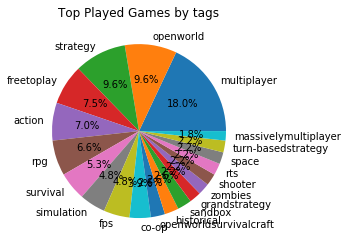

In [118]:
tp = {};
for tag in list(tags):
    tp[tag] = pd.Series([1 if tag in t else 0 for t in games_tp.tags])
tags_ds = pd.DataFrame(tp)
top20_bytags = tags_ds.sum().sort_values(ascending=False)[0:20]
fig2, ax2 = plt.subplots()
ax2.set_title("Top Played Games by tags")
ax2.pie(top20_bytags, labels=top20_bytags.index, autopct='%1.1f%%')
plt.show()

## Top Selling games by tags

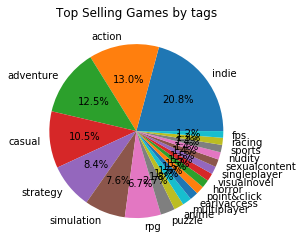

In [119]:
ts = {};
for tag in list(tags):
    ts[tag] = pd.Series([1 if tag in t else 0 for t in games_ts.tags])
tags_ds = pd.DataFrame(ts)
top20_bytags = tags_ds.sum().sort_values(ascending=False)[0:20]
fig3, ax3 = plt.subplots()
ax3.set_title("Top Selling Games by tags")
ax3.pie(top20_bytags, labels=top20_bytags.index, autopct='%1.1f%%')
plt.show()

## Top Played games by Price range

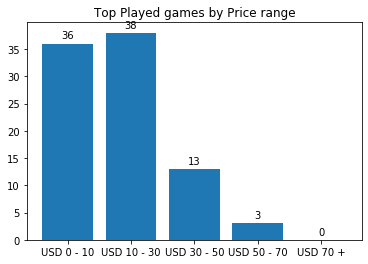

In [122]:
tp_pr = {}
tp_pr['USD 0 - 10'] = games_tp[(games_tp['price'] >= 0) & (games_tp['price'] < 10)]['name'].count()
tp_pr['USD 10 - 30'] = games_tp[(games_tp['price'] >= 10) & (games_tp['price'] < 30)]['name'].count()
tp_pr['USD 30 - 50'] = games_tp[(games_tp['price'] >= 30) & (games_tp['price'] < 50)]['name'].count()
tp_pr['USD 50 - 70'] = games_tp[(games_tp['price'] >= 50) & (games_tp['price'] < 70)]['name'].count()
tp_pr['USD 70 +'] = games_tp[(games_tp['price'] >= 70)]['name'].count()
fig4, ax4 = plt.subplots()
ax4.set_title("Top Played games by Price range")
autolabel(ax4.bar(tp_pr.keys(), tp_pr.values()), ax4)
plt.show()

## Top Selling games by Price range

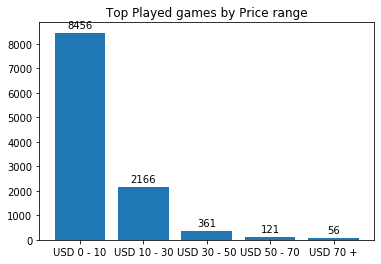

In [121]:
tp_pr = {}
tp_pr['USD 0 - 10'] = games_ts[(games_ts['price'] >= 0) & (games_ts['price'] < 10)]['name'].count()
tp_pr['USD 10 - 30'] = games_ts[(games_ts['price'] >= 10) & (games_ts['price'] < 30)]['name'].count()
tp_pr['USD 30 - 50'] = games_ts[(games_ts['price'] >= 30) & (games_ts['price'] < 50)]['name'].count()
tp_pr['USD 50 - 70'] = games_ts[(games_ts['price'] >= 50) & (games_ts['price'] < 70)]['name'].count()
tp_pr['USD 70 +'] = games_ts[(games_ts['price'] >= 70)]['name'].count()
fig4, ax4 = plt.subplots()
ax4.set_title("Top Selling games by Price range")
autolabel(ax4.bar(tp_pr.keys(), tp_pr.values()), ax4)
plt.show()